<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Chapter_6_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จุดมุ่งหมายของการทำ Cluster Analysis คือ การกลุ่มข้อมูลโดยดูจาก attributes ของข้อมูล

In [1]:
import pandas as pd

In [3]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/''pandas/master/pandas/tests/io/data/csv/iris.csv')

In [4]:
example_df 

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#ตัด column สุดท้ายที่เป็น class ของข้อมูลออก

In [9]:
example_df_drop = example_df.iloc[:,:-1]  #แถวเอาทั้งหมด หลักเอาก่อน สุดท้าย [:,:-1]
example_df_drop

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


จัดกลุ่มข้อมูลโดยใช้ ระยะห่าง(Distance)

K = กลุ่ม

จัดกลุ่มโดยดูว่าจุดอยู่ใกล้กับสีไหนก็จะเป็นสีนั้น กลุ่มนั้น

#Kmean

##import

In [6]:
from sklearn.cluster import KMeans

##Define

In [11]:
kmeans = KMeans() #ไม่ต้องใส่พารามิเตอร์เพราะไม่จำเป็นต้องใส่

##Fit-transform

คำนวณหาจุด cluster centers ของข้อมูล

In [13]:
kmeans.fit(example_df_drop)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [14]:
kmeans.cluster_centers_

array([[4.725     , 3.13333333, 1.42083333, 0.19166667],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.68636364, 2.67272727, 4.18636364, 1.30454545],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [5.26538462, 3.68076923, 1.50384615, 0.29230769],
       [5.2875    , 2.4375    , 3.4625    , 1.0625    ],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [6.45      , 3.01666667, 4.60555556, 1.43888889]])

ทำการจัดกลุ่มของ Data

In [16]:
y = kmeans.predict(example_df_drop)
y

array([4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 0, 7, 7, 7, 2, 7, 2, 7, 5, 7, 2, 5, 2, 2, 7, 5, 7,
       2, 2, 2, 2, 1, 2, 1, 7, 7, 7, 7, 7, 7, 5, 5, 5, 2, 1, 2, 7, 7, 2,
       2, 2, 2, 7, 2, 5, 2, 2, 2, 7, 5, 2, 3, 1, 3, 3, 3, 6, 2, 6, 3, 6,
       3, 1, 3, 1, 1, 3, 3, 6, 6, 1, 3, 1, 6, 1, 3, 6, 1, 1, 3, 3, 6, 6,
       3, 1, 1, 6, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int32)

#Quiz 6 ทำ PCA ข้อมูล  example_df_drop แล้ววาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(example_df_drop)  ## record - แถว  , dimension - หลัก

In [19]:
from matplotlib import pyplot as plt

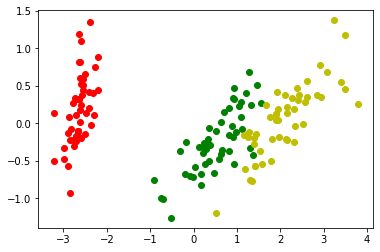

In [21]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')   #สีจริง#คำตอบที่แท้จริง
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

จับกลุ่มที่อยู่ใกล้ๆกันให้เป็นกลุ่มเดียวกัน

Kmeans ปัญหาคือเราไม่รู้ว่า K เท่ากับเท่าไหร่ อันนี้ k = 8